In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

folder = '.'
class Grid:
    def __init__(self, xm, xmr, xc, xcr, ym, ymr, yc, ycr, zm, zmr):
        self.xm = xm
        self.xmr= xmr
        self.xc = xc
        self.xcr= xcr
        self.ym = ym
        self.ymr= ymr
        self.yc = yc
        self.ycr= ycr
        self.zm = zm
        self.zmr= zmr

def read_grid(folder):
    with h5py.File(folder+"/outputdir/cordin_info.h5","r") as f:
        xm = f["xm"][()]
        xmr = f["xmr"][()]
        xc = f["xc"][()]
        xcr = f["xcr"][()]
        ym = f["ym"][()]
        ymr = f["ymr"][()]
        zm = f["zm"][()]
        zmr = f["zmr"][()]
    dy, dyr = ym[1] - ym[0], ymr[1] - ymr[0]
    yc, ycr = np.arange(0, dy*(ym.size+1), dy), np.arange(0, dyr*(ymr.size+1), dyr)
    return Grid(xm, xmr, xc, xcr, ym, ymr, yc, ycr, zm, zmr)

def read_zcut(folder, var, idx):
    varname = var+"/"+"%05d" % idx
    with h5py.File(folder+"/outputdir/flowmov/movie_zcut.h5","r") as f:
        A = f[varname][()]
    return A

def read_ycut(folder, var, idx):
    varname = var+"/"+"%05d" % idx
    with h5py.File(folder+"/outputdir/flowmov/movie_ycut.h5","r") as f:
        A = f[varname][()]
    return A

def count_samples(folder):
    with h5py.File(folder+"/outputdir/flowmov/movie_zcut.h5","r") as f:
        Nsamp = len(f["temp"].keys())
    return Nsamp

grid = read_grid(folder)
print("Finished reading grid.")

Nsamp = count_samples(folder)
Nsamp
print(Nsamp)
print("Constructed figure, starting loop.")



Finished reading grid.
1
Constructed figure, starting loop.


(0.001953125, 1.998046875, 0.001953125, 0.998046875)

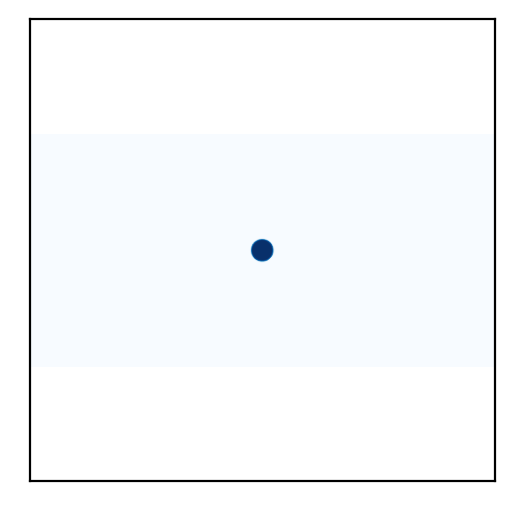

In [2]:
fig,ax=plt.subplots(figsize=(3,3),dpi=200)
for i in range(Nsamp)[-1:]:
    T = read_zcut(folder, "temp", i)
    # phi = read_zcut(folder, "phi", i)
    plt.contourf(grid.ym, grid.xm, T[:,:].T,400,vmin=0.0,vmax=1, cmap="Blues_r")
#    plt.colorbar()
    # plt.contour(grid.ymr, grid.xmr, phi.T, levels=[0.5], colors="k",linewidths=0.75)
    # phi[phi<0.5]=np.nan
    # plt.contourf(grid.ymr,grid.xmr,phi.T,vmin=0,vmax=1,cmap='gray')
    plt.axis('equal')
    plt.xlim(0.35,0.65)
    plt.ylim(0.35,0.65)

# for i in range(Nsamp)[1:5:1]:
#     # phi = read_zcut(folder, "phi", i)
#     plt.contour(grid.ymr, grid.xmr, phi.T, levels=[0.5], colors="k",linewidths=0.5)

plt.xticks([])
plt.yticks([])
plt.axis('equal')

In [11]:
Nsamp

3